<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>NUMERIEK BEPALEN VAN DE LIMIET VAN EEN FUNCTIE</h1>
    </font>
</div>

<div class="alert alert-box alert-success">
In de wiskundeles leer je limieten van rijen en functies berekenen a.d.h.v. bepaalde technieken en formules. Maar je kan een limiet ook numeriek benaderen.<br>
In deze notebook zal je de limiet van een functie bepalen door de limiet numeriek te benaderen.
</div>

### Nodige modules importeren

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation    # om animatie te maken
from IPython.display import HTML    # om animatie te laten zien in notebook

<div>
    <font color=#690027 markdown="1">
        <h2>1. De homografische functie met voorschrift $f(x) = \frac{1}{x}$</h2> 
    </font>
</div>

De grafiek van de functie met voorschrift $f(x) = \frac{1}{x}$ is een orthogonale hyperbool.<br>
Het domein van deze functie is $\mathbb{R}_{0}$.

Bepaal $$ \lim_{x \to +\infty} f(x),$$ $$ \lim_{x \to -\infty} f(x),$$ $$ \text{en} \lim_{x \to 0} f(x)$$ op een numerieke manier. 

<div>
    <font color=#690027 markdown="1">
        <h3>1.1 De homografische functie definiëren</h3> 
    </font>
</div>

In [2]:
# homografische functie met x != 0
def homografischefunctie(x):
    return 1/x

<div>
    <font color=#690027 markdown="1">
        <h3>1.2 De grafiek van de homografische functie bekijken</h3> 
    </font>
</div>

In [3]:
# grafiek van f
# 0 zit niet in domein, dus x-waarden kiezen die 0 niet bevatten
x_vanaf_1 = np.arange(1, 10, step=0.1)
print(x_vanaf_1)
x_breuk = np.flip(1/x_vanaf_1)   #     flip() draait de volgorde in de NumPy-lijst om
print(x_breuk)
x_pos = np.append(x_breuk, x_vanaf_1)
print(x_pos)
x_neg = -x_pos
# x = np.append(x_neg, x_pos)
# print("x =", x)

# y = homografischefunctie(x)
y_pos = homografischefunctie(x_pos)
y_neg = homografischefunctie(x_neg)
# print("y =", y)

# print(x.min(), x.max(), y.min(), y.max())

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[0.1010101  0.10204082 0.10309278 0.10416667 0.10526316 0.10638298
 0.10752688 0.10869565 0.10989011 0.11111111 0.11235955 0.11363636
 0.11494253 0.11627907 0.11764706 0.11904762 0.12048193 0.12195122
 0.12345679 0.125      0.12658228 0.12820513 0.12987013 0.13157895
 0.13333333 0.13513514 0.1369863  0.13888889 0.14084507 0.14285714
 0.14492754 0.14705882 0.14925373 0.15151515 0.15384615 0.15625
 0.15873016 0.16129032 0.16393443 0.16666667 0.16949153 0.17241379
 0.1754386  0.17857143 0.18181818 0.18518519 0.18867925 0.19230769
 0.19607843 0.2        0.20408163 0.20833333 0.21276596 0.2173913
 0.22222222 0.22727273 0.23255814 0

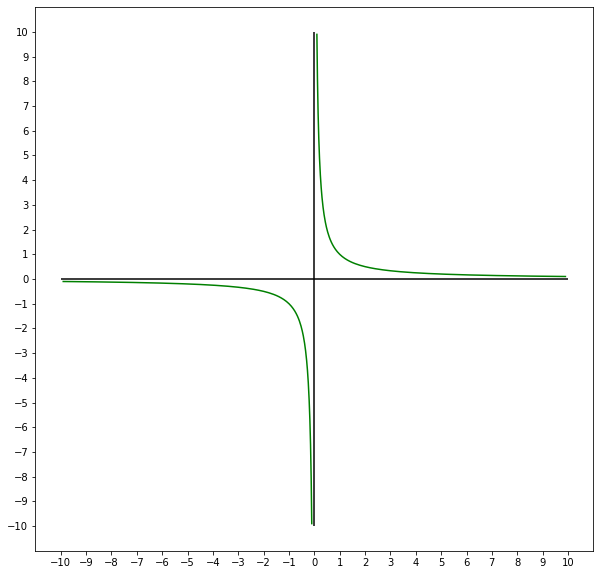

In [4]:
# grafiek van f

plt.figure(figsize=(10,10))

plt.hlines(0, -10, 10, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")

plt.xticks(np.arange(-10, 11, step=1))
plt.yticks(np.arange(-10, 11, step=1))

plt.show()

<div>
    <font color=#690027 markdown="1">
        <h2>2. Op zoek naar de limieten van de homografische functie op $\infty$</h2> 
    </font>
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>2.1 Op zoek naar de limiet van de homografische functie voor $x \rightarrow + \infty$</h3> 
    </font>
</div>

Om de limiet te kunnen bepalen op een numerieke manier, zal je een rij opbouwen a.d.h.v. punten op de grafiek van f.

Dat is bijvoorbeeld de rij $u$ met expliciet voorschrift $\displaystyle{u_{n} = \frac{1}{n}}$ met $n \geq 1$.


In [5]:
# rij door opsomming
indices_rechts = list(range(1, 11))                  # indices_rechts is geen NumPy-lijst hier
print("indices_rechts =", indices_rechts)
# print(type(indices_rechts))

# enkele termen berekenen
u_deel_rechts = []
for index in indices_rechts:
    term = homografischefunctie(index)
    u_deel_rechts.append(term)

# berekende termen tonen
for index, term in zip(indices_rechts, u_deel_rechts):
    print(f"u{index} = {term}")

indices_rechts = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
u1 = 1.0
u2 = 0.5
u3 = 0.3333333333333333
u4 = 0.25
u5 = 0.2
u6 = 0.16666666666666666
u7 = 0.14285714285714285
u8 = 0.125
u9 = 0.1111111111111111
u10 = 0.1


Bekijk de gekozen punten op de grafiek van f. De indices spelen de rol van x, de termen de rol van y.

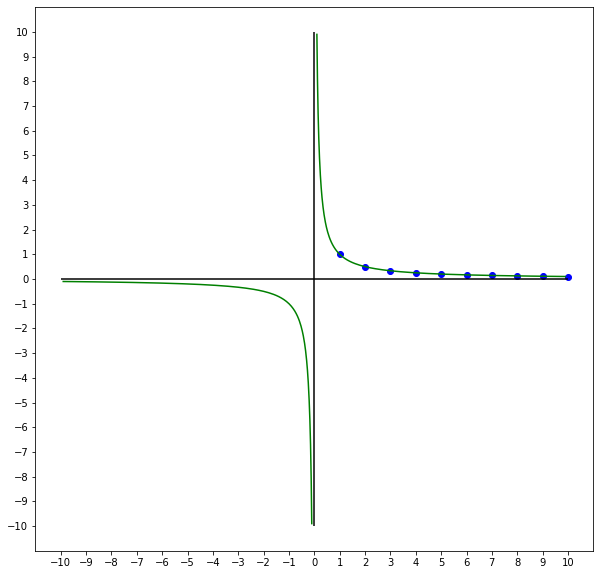

In [6]:
plt.figure(figsize=(10,10))

plt.hlines(0, -10, 10, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")

plt.scatter(indices_rechts, u_deel_rechts, color="blue")

plt.xticks(np.arange(-10, 11, step=1))
plt.yticks(np.arange(-10, 11, step=1))

plt.show()

<div>
    <font color=#000000 markdown="1">
        <h3>Besluit over de limiet van de homografische functie voor $x \rightarrow + \infty$</h3> 
    </font>
</div>

De limiet van de functie komt overeen met de limiet van de rij.<br>
De termen zijn steeds positief en worden steeds kleiner naarmate de index toeneemt. Dus:
$$ \lim_{n \to +\infty} u_{n} = 0$$
Waaruit volgt dat:
$$ \lim_{x \to +\infty} f(x) = 0$$

In [7]:
# animatie
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis([-10,10,-10,10])                # bereik vastleggen van de grafiek 

plt.hlines(0, -10, 10, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")
ln, = plt.plot([], [], marker="o", color="blue")

def animate(i):
    ln.set_data(indices_rechts[i], u_deel_rechts[i])
    
plt.close()  # om voorlopig plot-venster te sluiten, het hoeft niet getoond te worden, enkel animatiescherm nodig

anim = animation.FuncAnimation(fig, animate, interval=500, repeat=False, frames=len(indices_rechts))

HTML(anim.to_jshtml())

### Opdracht 2.1
- Pas de code aan zodat er meer termen van de rij getoond worden.
- Zorg ervoor dat de termen onder $\frac{1}{1000}$ komen. 

In [8]:
# voorbeeldcode
# rij door opsomming
indices_rechts_aangepast = list(range(1, 2000))                  # indices_rechts is geen NumPy-lijst hier
print("indices_rechts_aangepast =", indices_rechts_aangepast)

# enkele termen berekenen
u_deel_rechts_aangepast = []
for index in indices_rechts_aangepast:
    term = homografischefunctie(index)
    u_deel_rechts_aangepast.append(term)

# berekende termen tonen
for index, term in zip(indices_rechts_aangepast, u_deel_rechts_aangepast):
    print(f"u{index} = {term}")

indices_rechts_aangepast = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

### Opdracht 2.2
- Pas de code aan zodat er enkele termen van de rij getoond worden, maar de termen toch onder $\frac{1}{1000}$ komen.
- De uitvoer moet duidelijk aangeven dat de rij naar 0 nadert. 

In [9]:
# voorbeeldcode
# rij door opsomming
indices_rechts_tweedemanier = []
for i in range(1, 10):
    indices_rechts_tweedemanier.append(10**i)
print("indices_rechts_tweedemanier =", indices_rechts_tweedemanier)

# enkele termen berekenen
u_deel_rechts_tweedemanier = []
for index in indices_rechts_tweedemanier:
    term = homografischefunctie(index)
    u_deel_rechts_tweedemanier.append(term)

# berekende termen tonen
for index, term in zip(indices_rechts_tweedemanier, u_deel_rechts_tweedemanier):
    print(f"u{index} = {term}")

indices_rechts_tweedemanier = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
u10 = 0.1
u100 = 0.01
u1000 = 0.001
u10000 = 0.0001
u100000 = 1e-05
u1000000 = 1e-06
u10000000 = 1e-07
u100000000 = 1e-08
u1000000000 = 1e-09


<div>
    <font color=#690027 markdown="1">
        <h3>2.2 De limiet van de homografische functie voor $x \rightarrow - \infty$</h3> 
    </font>
</div>

Nu heb je een rij nodig die wordt opgebouwd met punten op de linkertak van de grafiek van f.

In [10]:
# rij door opsomming
indices_links = -1 * np.array(range(1, 11))      # indices is nu een NumPy-lijst
print("indices_links =", indices_links)
# print(type(indices_links)

# enkele termen berekenen
u_deel_links = []
for index in indices_links:
    term = homografischefunctie(index)
    u_deel_links.append(term)

# berekende termen tonen
for index, term in zip(indices_links, u_deel_links):
    print(f"u{-index} = {term}")

indices_links = [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]
u1 = -1.0
u2 = -0.5
u3 = -0.3333333333333333
u4 = -0.25
u5 = -0.2
u6 = -0.16666666666666666
u7 = -0.14285714285714285
u8 = -0.125
u9 = -0.1111111111111111
u10 = -0.1


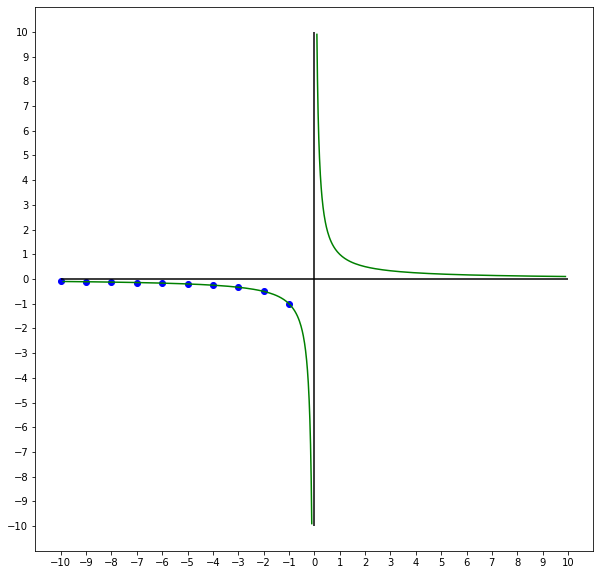

In [11]:
plt.figure(figsize=(10,10))

plt.hlines(0, -10, 10, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")

plt.scatter(indices_links, u_deel_links, color="blue")

plt.xticks(np.arange(-10, 11, step=1))
plt.yticks(np.arange(-10, 11, step=1))

plt.show()

<div>
    <font color=#000000 markdown="1">
        <h3>Besluit over de limiet van de homografische functie voor $x \rightarrow + \infty$</h3> 
    </font>
</div>

De limiet van de functie komt overeen met de limiet van de rij.<br>
De termen zijn steeds negatief, maar worden steeds groter naarmate de index toeneemt. Dus:
$$ \lim_{n \to \infty} u_{n} = 0$$
Waaruit volgt dat:
$$ \lim_{x \to -\infty} f(x) = 0$$

In [12]:
# animatie

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis([-10,10,-10,10])                # bereik vastleggen van de grafiek 

plt.hlines(0, -10, 10, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")
ln, = plt.plot([], [], marker="o", color="blue")

def animate(i):
    ln.set_data(indices_links[i], u_deel_links[i])
    
plt.close()  # om voorlopig plot-venster te sluiten, het hoeft niet getoond te worden, enkel animatiescherm nodig

anim = animation.FuncAnimation(fig, animate, interval=500, repeat=False, frames=len(indices_rechts))

HTML(anim.to_jshtml())

<div>
    <font color=#690027 markdown="1">
        <h2>3. De limiet van de homografische functie voor $x \rightarrow 0$</h2> 
    </font>
</div>

Nu heb je een rij nodig die wordt opgebouwd met punten op de rechtertak of de linkertak van de grafiek van *f*. Je moet bekijken naar waar de y-waarden naderen, wanneer de x-waarden naderen naar 0.

Omdat 0 niet tot het domein van *f* behoort, zal je zowel de linker- als de rechterlimiet van *f* in 0 bepalen.<br>
Voor de rechterlimiet zal de code een rij met originelen moeten genereren die van langs rechts nadert naar 0, en een rij met de overeenkomstige beelden. De limiet van de rij met de beelden is dezelfde als de rechterlimiet van de functie in 0:
$$ \lim_{x \to +0} f(x)$$
Voor de linkerlimiet zal je op een analoge manier moeten te werk gaan. 

<div>
    <font color=#690027 markdown="1">
        <h3>3.1 De rechterlimiet van de homografische functie voor $x \rightarrow 0$</h3> 
    </font>
</div>

In [13]:
# rechterlimiet in 0
originelen_rechts = [4, 3, 2, 1, 0.5, 0.25]
for i in range(1, 7):
    originelen_rechts.append(1/(10**i))
print("originelen_rechts = ", originelen_rechts)
beelden_rechts = []
for o in originelen_rechts:
    beelden_rechts.append(homografischefunctie(o))
print("beelden_rechts = ", beelden_rechts)

for x, y in zip(originelen_rechts, beelden_rechts):
    print(f"f({x}) = {y}")

originelen_rechts =  [4, 3, 2, 1, 0.5, 0.25, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06]
beelden_rechts =  [0.25, 0.3333333333333333, 0.5, 1.0, 2.0, 4.0, 10.0, 100.0, 1000.0, 10000.0, 99999.99999999999, 1000000.0]
f(4) = 0.25
f(3) = 0.3333333333333333
f(2) = 0.5
f(1) = 1.0
f(0.5) = 2.0
f(0.25) = 4.0
f(0.1) = 10.0
f(0.01) = 100.0
f(0.001) = 1000.0
f(0.0001) = 10000.0
f(1e-05) = 99999.99999999999
f(1e-06) = 1000000.0


Antwoord: $\displaystyle{\lim_{x \to +0} f(x)} = +\infty$ 

In [14]:
# animatie

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis([-1, 5, -10, 10])                # bereik vastleggen van de grafiek 

plt.hlines(0, -1, 5, color="black")
plt.vlines(0, -10, 10, color="black")
plt.plot(x_pos, y_pos, color="green")
plt.plot(x_neg, y_neg, color="green")

ln, = plt.plot([], [], marker="o", color="blue")

def animate(i):
    ln.set_data(originelen_rechts[i], beelden_rechts[i])
    
plt.close()  # om voorlopig plot-venster te sluiten, het hoeft niet getoond te worden, enkel animatiescherm nodig

anim = animation.FuncAnimation(fig, animate, interval=500, repeat=False, frames=len(originelen_rechts))

HTML(anim.to_jshtml())

<div>
    <font color=#690027 markdown="1">
        <h3>3.2 De linkerlimiet van de homografische functie voor $x \rightarrow 0$</h3> 
    </font>
</div>

### Opdracht 3.1
Bepaal de linkerlimiet in 0.

In [15]:
# voorbeeldcode
# linkerlimiet in 0
originelen_links = - np.array(originelen_rechts)     # type casting naar NumPy-lijst om rekenkundige bewerking te kunnen doen
print("originelen_links = ", originelen_links)
beelden_links = []
for o in originelen_links:
    beelden_links.append(homografischefunctie(o))
print("beelden_links = ", beelden_links)

for x, y in zip(originelen_links, beelden_links):
    print(f"f({x}) = {y}")

originelen_links =  [-4.0e+00 -3.0e+00 -2.0e+00 -1.0e+00 -5.0e-01 -2.5e-01 -1.0e-01 -1.0e-02
 -1.0e-03 -1.0e-04 -1.0e-05 -1.0e-06]
beelden_links =  [-0.25, -0.3333333333333333, -0.5, -1.0, -2.0, -4.0, -10.0, -100.0, -1000.0, -10000.0, -99999.99999999999, -1000000.0]
f(-4.0) = -0.25
f(-3.0) = -0.3333333333333333
f(-2.0) = -0.5
f(-1.0) = -1.0
f(-0.5) = -2.0
f(-0.25) = -4.0
f(-0.1) = -10.0
f(-0.01) = -100.0
f(-0.001) = -1000.0
f(-0.0001) = -10000.0
f(-1e-05) = -99999.99999999999
f(-1e-06) = -1000000.0


Antwoord: 

Antwoord: $\displaystyle{\lim_{x \to -0} f(x)} = -\infty$ 

### Antwoord
Omdat de linker- en de rechterlimiet verschillend zijn, bestaat $\displaystyle{\lim_{x \to 0} f(x)}$ niet.

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python voor Numerieke methodes, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière, is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 